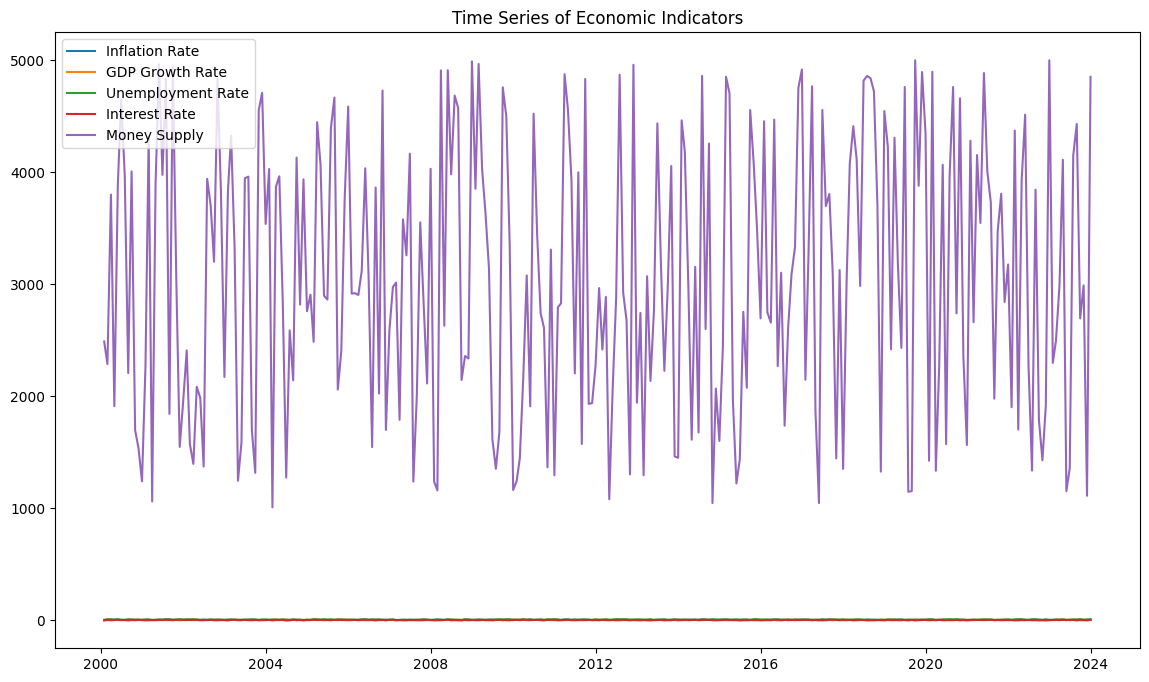

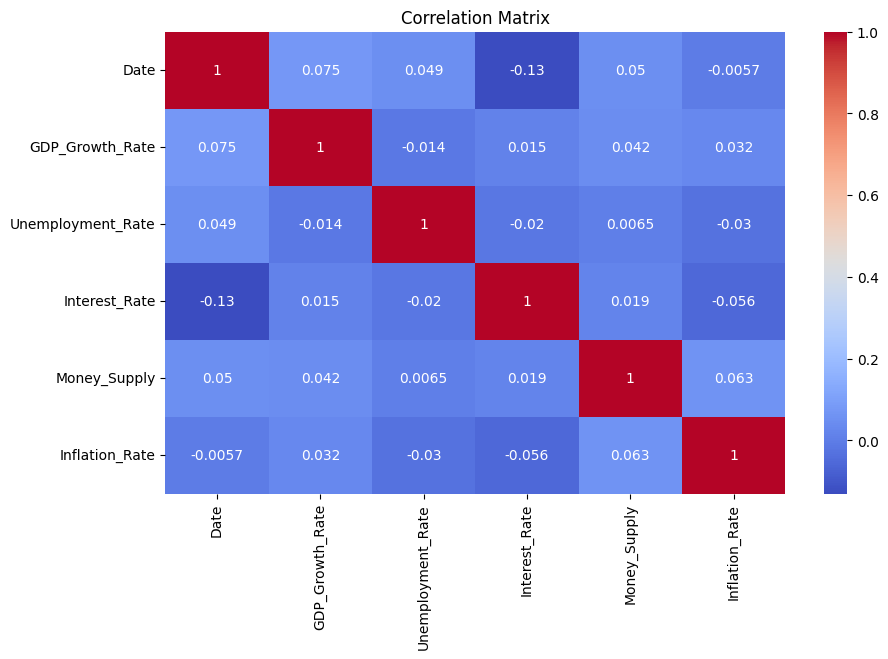

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv('inflation_data.csv', parse_dates=['Date'])

# Plot the time series of the features
plt.figure(figsize=(14, 8))
plt.plot(df['Date'], df['Inflation_Rate'], label='Inflation Rate')
plt.plot(df['Date'], df['GDP_Growth_Rate'], label='GDP Growth Rate')
plt.plot(df['Date'], df['Unemployment_Rate'], label='Unemployment Rate')
plt.plot(df['Date'], df['Interest_Rate'], label='Interest Rate')
plt.plot(df['Date'], df['Money_Supply'], label='Money Supply')
plt.legend()
plt.title('Time Series of Economic Indicators')
plt.show()

# Correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


Mean Squared Error: 2.109295174614404


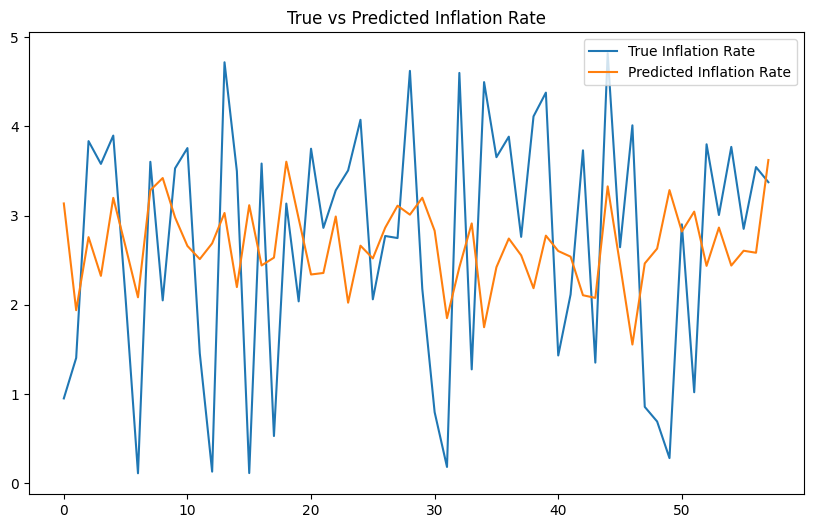

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Prepare the data
X = df[['GDP_Growth_Rate', 'Unemployment_Rate', 'Interest_Rate', 'Money_Supply']]
y = df['Inflation_Rate']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Plot the predictions
plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Inflation Rate')
plt.plot(y_pred, label='Predicted Inflation Rate')
plt.legend()
plt.title('True vs Predicted Inflation Rate')
plt.show()


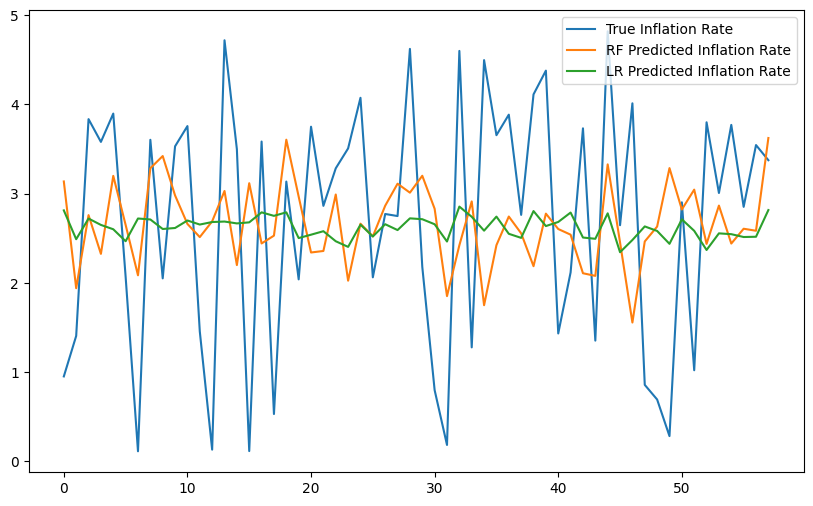

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make predictions with Random Forest
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)


# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Make predictions with Linear Regression
y_pred_lr = lr_model.predict(X_test)

# Evaluate the Linear Regression model
mse_lr = mean_squared_error(y_test, y_pred_lr)


# Plot the predictions

plt.figure(figsize=(10, 6))
plt.plot(y_test.values, label='True Inflation Rate')
plt.plot(y_pred_rf, label='RF Predicted Inflation Rate')
plt.plot(y_pred_lr, label='LR Predicted Inflation Rate')
plt.legend()
